In [1]:
#importamos librerias
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import numpy as np

In [2]:
pwd

'C:\\Users\\axelt\\Documents\\UVG4\\InteligenciaArtificial\\LabRegresion'

In [4]:
#Creamos una variable para leer el archivo CSV
blinky = pd.read_csv("Admission_Predict.csv")
blinky.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


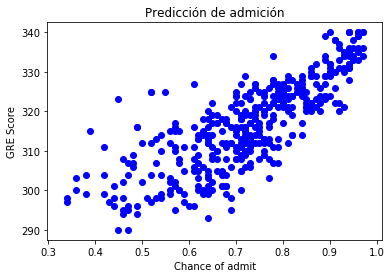

In [5]:
#Asignamos a la variable x los datos de GRE Score
#Asigne gre score ya que es la prueba que se realiza en USA para conocer los conocimientos de los graduados y es
#necesaria para optar a un postgrado 
X =  blinky.GRE_Score
y = blinky.iloc[:, 8].values
XM = np.array([y])
#Asignamos a la variable y los datos de Chance of Admit              
ym = np.array([X]) 
plt.scatter(XM, ym, color = 'blue')
plt.title('Predicción de admición')
plt.xlabel('Chance of admit')
plt.ylabel('GRE Score')
plt.show()

In [6]:
#Separamos los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(XM.reshape(-1,1), ym.reshape(-1,1), test_size=0.2)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 1)

In [8]:
#Tomamos las caracteristicas existentes a caracteristicas de mayor grado 
from sklearn.preprocessing import StandardScaler
#X_train_poli = poli_reg.fit_transform(XM)
#X_test_poli = poli_reg.fit_transform(ym)
#poli_reg = StandardScaler()
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)

In [9]:
from sklearn import datasets, linear_model
#Definir modelo de regresion linear 
pr = linear_model.LinearRegression()

In [10]:
#Entrenar datos
pr.fit(X_train_poli, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#Se realiza la prediccion
Y_pred_pr = pr.predict(X_test_poli)

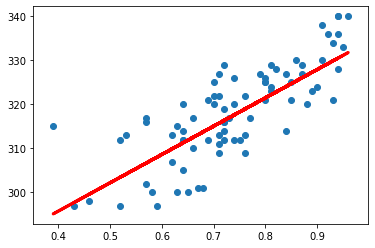

In [12]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=3)
plt.show()